# **K-means**
- Common clustering technique, helps to solve many problems efficiently.
- one of the simplest and popular unsupervised machine learning algorithms.
- unsupervised algorithms means that our datasets using only input vectors(X) without referring to labelled, outcomes(Y).
-a common technique for statistical data analysis
## **The objective of K-means is simple:**
### Group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster,The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.


# **Problem:** 
### We are opening a Cake Shops and we have list of locations of BUYERS who frequently order Cake we want to find out optimal locations of Cake Shops where they should be opened?
(just taking example)

![cake_meme](https://user-images.githubusercontent.com/42711978/87532315-908e2580-c6b0-11ea-8eff-01000290d667.jpg)


# Step-1 : Initialise Cake Shops randomly.

![img2133](https://user-images.githubusercontent.com/42711978/87532558-f7abda00-c6b0-11ea-9f0c-f5730efa1eca.png)


# Step-2 : Assign each Buyer to its nearest Cake Shop.

![img2](https://user-images.githubusercontent.com/42711978/87532632-1316e500-c6b1-11ea-9b78-64e16a818b60.png)


# Step-3 : Update the Shop Location by taking mean of Buyers assigned to it.

![img21](https://user-images.githubusercontent.com/42711978/87532691-29bd3c00-c6b1-11ea-8b03-ba6aef024807.png)


# Step-4 : Repeat Steps 2 and 3 Until Convergence.

![img213](https://user-images.githubusercontent.com/42711978/87532792-48233780-c6b1-11ea-9cf9-be5acc7f2de2.png)


## **How the K-means algorithm works?**



To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

**1. Cluster assignment**<br>
the algorithm goes through each of the data points and depending on which cluster is closer, It assigns the data points to one of the cluster centroids.<br>
**2. Updation centroid**<br>
K-means moves the centroids to the average of the points in a cluster. In other words, the algorithm calculates the average of all the points in a cluster and moves the centroid to that average location.
This process is repeated until there is no change in the clusters. K is chosen randomly or by giving specific initial starting points by the us.


![img](https://user-images.githubusercontent.com/42711978/87543560-97be2f00-c6c2-11ea-8ab3-f7fd89605cfb.png)


### **Cluster Quality**
Our goal here is not just to make many clusters but to make the most meaningful clusters. We can measure the quality of clusters using a metric called Interia.
       
* **Inertia** is the average distortion of the clusters. \n",
* **Distortion** is calculated at the cluster level. For each cluster, it calculates the sum of squared \"error\" where error is considered as the distance of a every datapoint from its cluster centroid.

Think about this, if we have 500 data-points, the model can create 500 clusters, thus making distortion zero and the \"best quality\". Measuring the performance just based on distortion is not good enough. Therefore, picking 'k' is a very important step in building a clustering model.


### **How do we choose 'k'?**

A fundamental step for any clustering algorithm is to determine the optimal number of clusters (k) into which the data may be clustered.
       
![](https://user-images.githubusercontent.com/42711978/87970313-2c6cc680-cae1-11ea-865b-a775d7d06ec1.png)

**WCSS** is an ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The objective is to minimise this value.
        ![](https://www.researchgate.net/profile/Chirag_Deb/publication/320986519/figure/fig8/AS:560163938422791@1510564898246/Result-of-the-elbow-method-to-determine-optimum-number-of-clusters.png)<br>
The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and records the avearage distortion for each of these k values. We expect this graph to produce a long-tail (as we increase the clusters, the distortions will reduce) and the goal is to identify the \"elbow\" which optimizes the number of clusters without overfitting.

## Implement K-Means Algorithm

#### Dataset
Make_blobs in sklearn is a nice functionaity which gives us a way to create synthetic grouped datapoints which serve as very good datasets to visualize clustering algorithms.

#### Algorithm
The main goal of this section is to write out the algorithm for K-Means Clustering without the use of external ML packages and to understand each step that is performed.

#### Objective
Running this code on our synthetic dataset will allow us to understand how the model iteratively clusters.

In [9]:
#Import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
#Number of Centroids
k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

#Creates a list of lists (A of B) where length of A is 500, lengths of all B is 2, centers is the number of clusters 
X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)

#If you want to generate a correspoding y vector too, uncomment the below statement and run this cell
#X,y =make_blobs(n_samples=500,n_features=2,centers=k,random_state=10)

#Sample the shape to know how many (rows,columns) are present in your synthetic dataset
#This dataset has 2 columns which are "x coordinate" and "y coordinate" and each row is a datapoint
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


In [11]:
#DEFINE ALL THE FUNCTIONS & VARIABLES WE NEED TO DO CLUSTERING
#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []
      
      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary 

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = [] 
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)
          
        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix]) 

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        
        cluster_points = np.array(cluster_points)
        #here pts are array of list but we want array of array so
        
        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge

In [14]:
#We need to visualize this too. Lets define a function that can do that!
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)
        
        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)
        
        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="o")

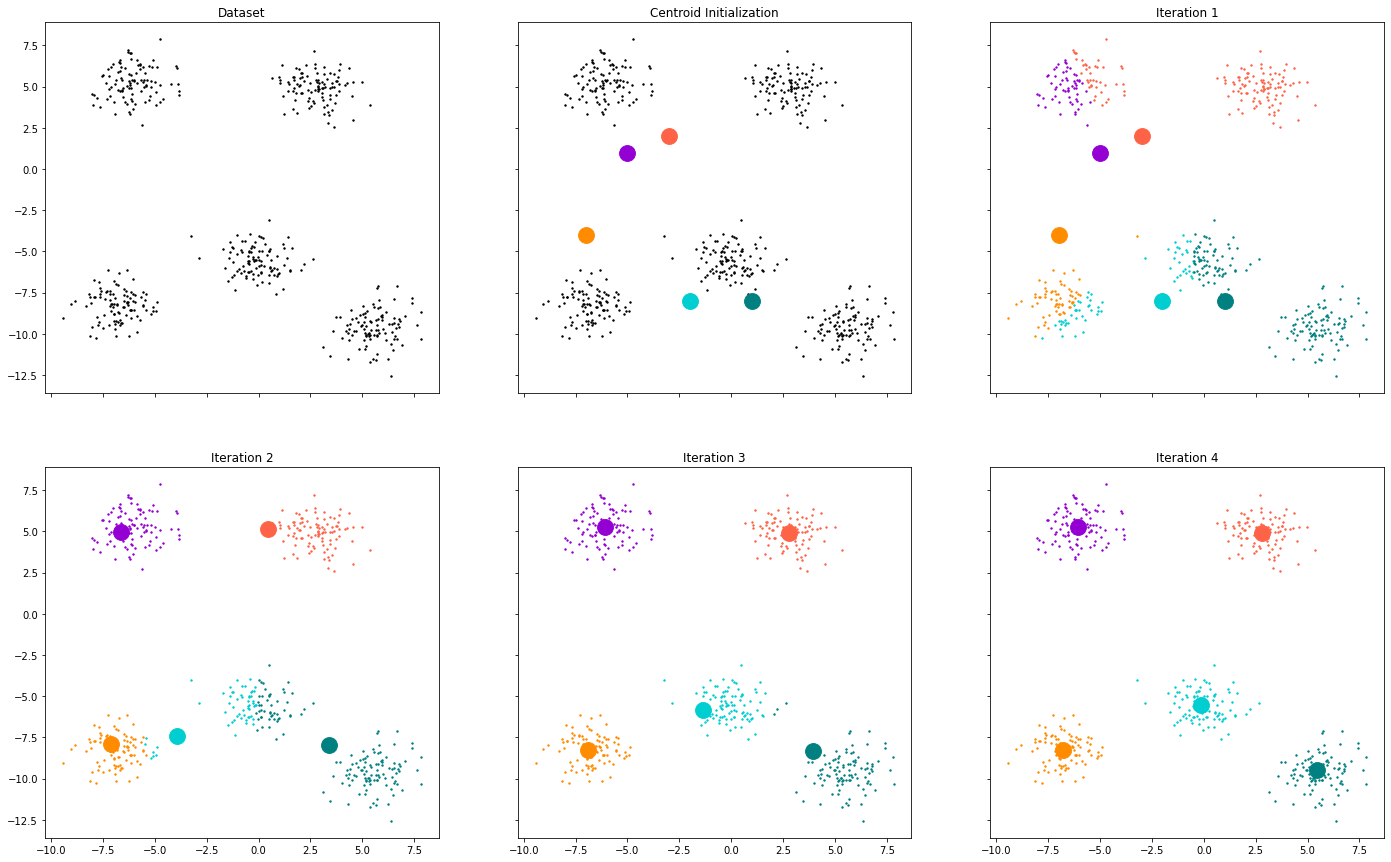

In [16]:
#Lets create a 6 panel plot showing how the cluster centroids evolve with each iteration
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(24, 15)

#DATAPOINTS
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

#CENTROID INITIALIZATION
#Lets call our function that intializes the centroids
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Using KMeans++ from sklearn


In [17]:
from sklearn.cluster import KMeans
#Check out all functionalities at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

KMeans(n_clusters=5)

INERTIA = 872.8554968701878
ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[ 2.78561142  4.93182424]
 [-0.06909909 -5.56399319]
 [-6.06533341  5.2400571 ]
 [-6.78567723 -8.26282547]
 [ 5.56873506 -9.60861515]]



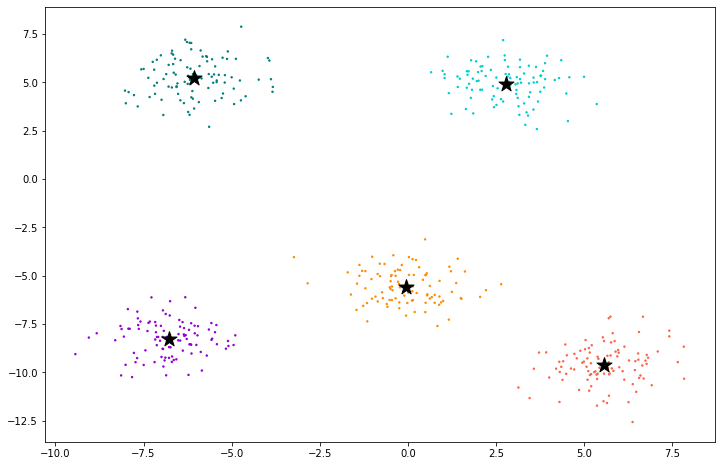

In [18]:
#Lets inspect the clustering model
print("INERTIA = " + str(kmeans_demo.inertia_))
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "*")
plt.gcf().set_size_inches(12,8)
plt.show()

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default=10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.

In [20]:
#Let us try this out without defining the cluster counts and see what the optimal number of clusters are
kmeans_demo2 = KMeans() #What if we dont initialize the number of clusters?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo2.fit(X)

KMeans()

INERTIA = 676.561102778494
ITERATIONS TO CONVERGE = 8
CLUSTER CENTROIDS = 
[[  2.78561142   4.93182424]
 [ -0.68750373  -5.28678267]
 [ -6.77302495   4.6318491 ]
 [ -6.78567723  -8.26282547]
 [  6.321178    -8.97875638]
 [ -5.53146084   5.69888068]
 [  0.75064659  -5.9314583 ]
 [  5.02386258 -10.06471977]]



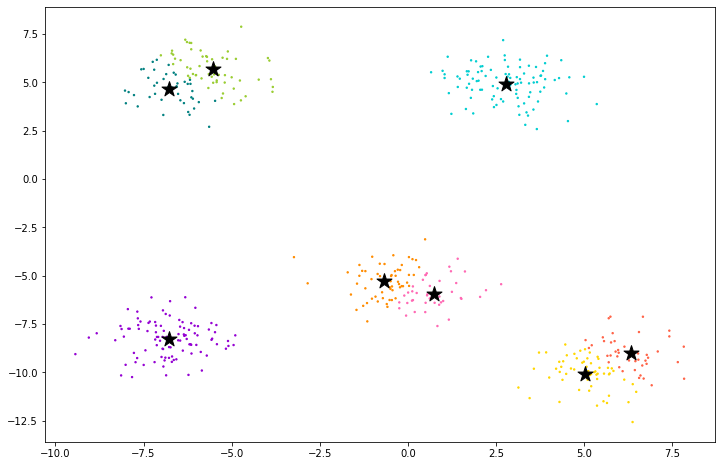

In [21]:
#Lets inspect the clustering model
print("INERTIA = " + str(kmeans_demo2.inertia_))
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo2.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo2.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo2.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo2.cluster_centers_[:,0], kmeans_demo2.cluster_centers_[:,1], c = 'black', s=250, marker = "*")
plt.gcf().set_size_inches(12,8)
plt.show()

Thats interesting! Even though the data visually has 5 clusters, KMeans has found 8 to be the optimal number of clusters!